In [356]:
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters

Método basado en un típica descomposición de la serie de tiempo, donde se le asigna mayor peso a las observaciones más recientes. La descomposición de este método puede ser lineal (la serie se descompone en partes que se suman) o multiplicativa (la serie se descomponen en variables que se multiplican) en ambos casos utiliza los siguientes componentes:



In [283]:
GNVdataDemanda = pd.read_excel("GNVdataCopia.xlsx",sheet_name=1)
GNVdataDemanda

,Fecha,Giga_BTU
0,2001-01-01,208
1,2001-02-01,203
2,2001-03-01,344
3,2001-04-01,194
4,2001-05-01,125
...,...,...
175,2015-08-01,513
176,2015-09-01,789
177,2015-10-01,939
178,2015-11-01,983


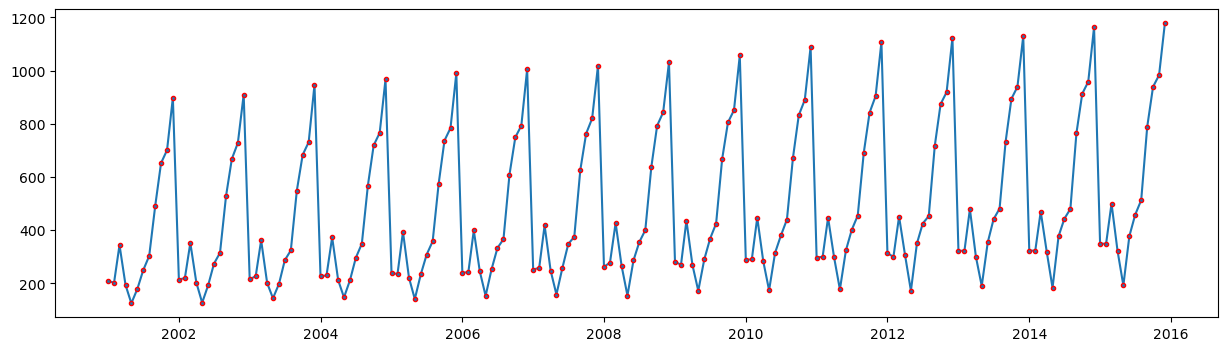

In [340]:
fig = plt.figure(figsize=(15, 4))
plt.plot(GNVdataDemanda['Fecha'],GNVdataDemanda['Giga_BTU'],marker='o',markersize=3, markeredgecolor='red')
plt.show()

In [341]:
GNVdataProduccion = pd.read_excel("GNVdataCopia.xlsx",sheet_name=3)
GNVdataProduccion

,Fecha,Giga_BTU
0,2001-01-01,394
1,2001-02-01,410
2,2001-03-01,407
3,2001-04-01,391
4,2001-05-01,297
...,...,...
175,2015-08-01,671
176,2015-09-01,395
177,2015-10-01,877
178,2015-11-01,878


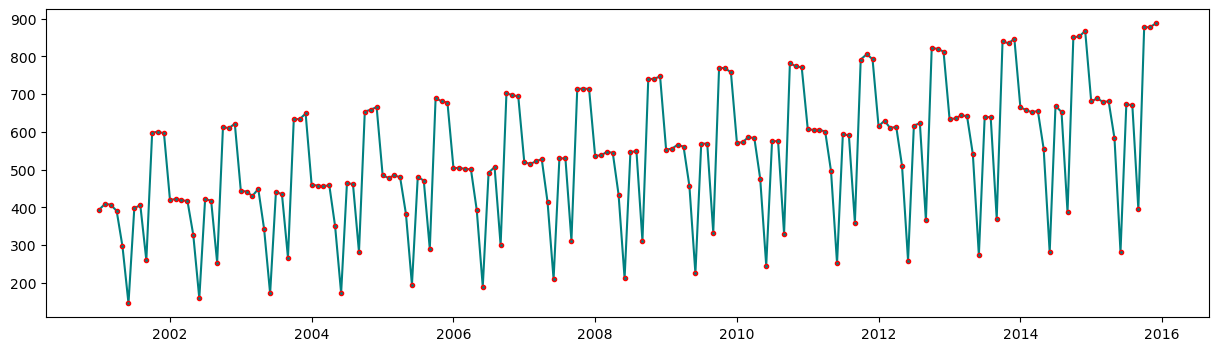

In [346]:
fig = plt.figure(figsize=(15, 4))
plt.plot(GNVdataProduccion['Fecha'],GNVdataProduccion['Giga_BTU'],marker='o',markersize=3, markeredgecolor='red',color='teal')
plt.show()

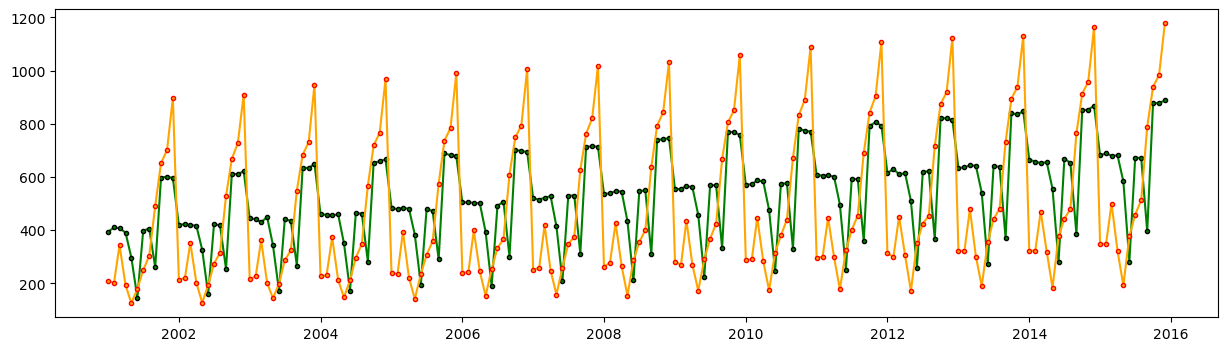

In [351]:
fig = plt.figure(figsize=(15, 4))
plt.plot(GNVdataProduccion['Fecha'],GNVdataProduccion['Giga_BTU'],color="g",marker='o',markersize=3, markeredgecolor='black')
plt.plot(GNVdataDemanda['Fecha'],GNVdataDemanda['Giga_BTU'],marker='o',markersize=3, markeredgecolor='red',color='orange')
plt.show()


# Descomponiendo la serie de tiempo

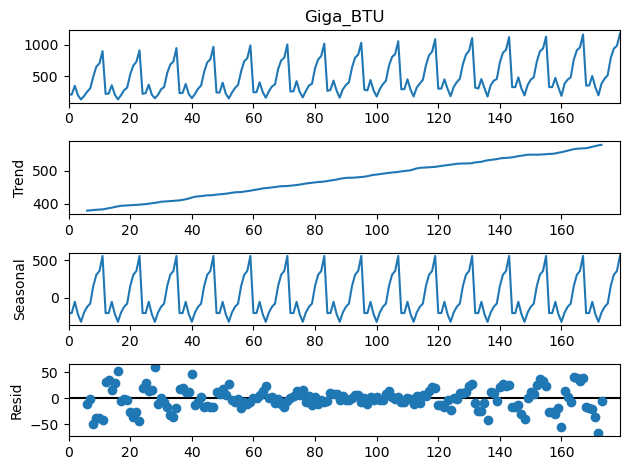

In [298]:
decompose_result = seasonal_decompose(GNVdataDemanda['Giga_BTU'],period=12,model='additive')
decompose_result.plot();

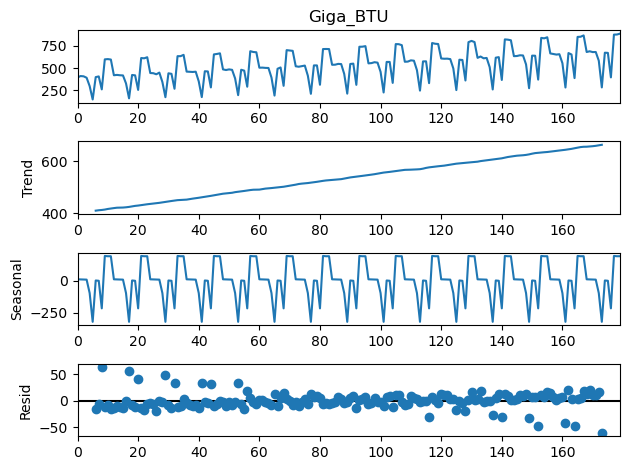

In [299]:
decompose_result_production = seasonal_decompose(GNVdataProduccion['Giga_BTU'],period=12,model='additive')
decompose_result_production.plot();

In [305]:
m = 12
alpha = 1/(2*m)
alpha

0.041666666666666664

# Single Smoothing HWES

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing -Nivel'}>

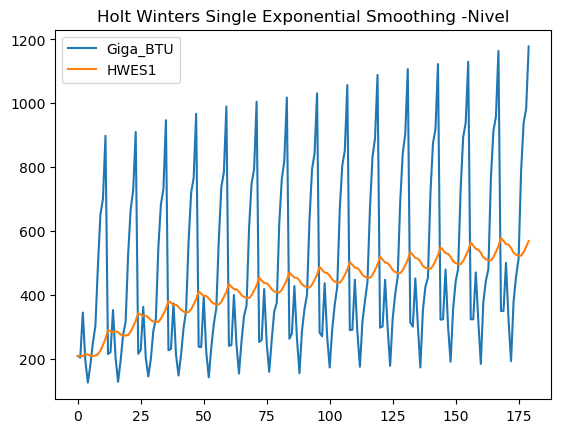

In [375]:
GNVdataDemanda['HWES1'] = SimpleExpSmoothing(GNVdataDemanda['Giga_BTU']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
GNVdataDemanda[['Giga_BTU','HWES1']].plot(title='Holt Winters Single Exponential Smoothing -Nivel')

# Double HWES

<Figure size 3000x400 with 0 Axes>

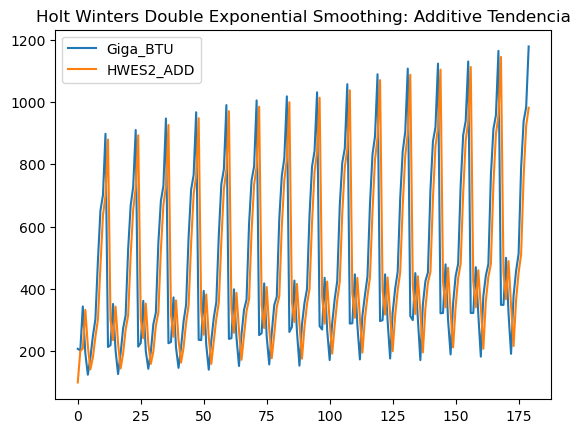

In [379]:
fig = plt.figure(figsize=(30, 4))
GNVdataDemanda['HWES2_ADD'] = ExponentialSmoothing(GNVdataDemanda['Giga_BTU'],trend='add').fit().fittedvalues
GNVdataDemanda['HWES2_MUL'] = ExponentialSmoothing(GNVdataDemanda['Giga_BTU'],trend='mul').fit().fittedvalues
GNVdataDemanda[['Giga_BTU','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive Tendencia')
plt.show()

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive Estacionalidad'}>

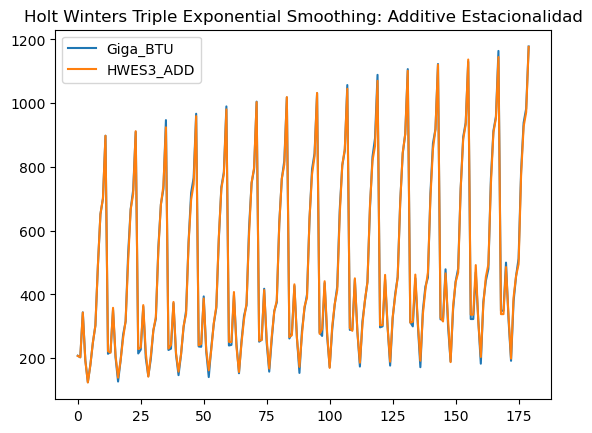

In [380]:
GNVdataDemanda['HWES3_ADD'] = ExponentialSmoothing(GNVdataDemanda['Giga_BTU'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
GNVdataDemanda['HWES3_MUL'] = ExponentialSmoothing(GNVdataDemanda['Giga_BTU'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
GNVdataDemanda[['Giga_BTU','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Estacionalidad')

# Predicción

In [417]:
GNVdataDemanda_forecast = pd.read_excel("GNVdataCopia.xlsx",sheet_name=1)
GNVdataDemanda_forecast

,Fecha,Giga_btu
0,2001-01-01,208
1,2001-02-01,203
2,2001-03-01,344
3,2001-04-01,194
4,2001-05-01,125
...,...,...
175,2015-08-01,513
176,2015-09-01,789
177,2015-10-01,939
178,2015-11-01,983


In [432]:
train_GNVdataDemanda = GNVdataDemanda_forecast[0:180]
test_GNVdataDemanda = GNVdataDemanda_forecast[144:180]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters Demanda')

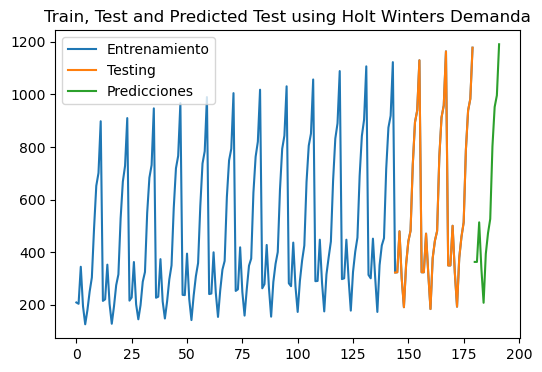

In [439]:
fitted_model = ExponentialSmoothing(train_GNVdataDemanda['Giga_btu'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)

train_GNVdataDemanda['Giga_btu'].plot(legend=True,label='Entrenamiento')
test_GNVdataDemanda['Giga_btu'].plot(legend=True,label='Testing',figsize=(6,4))
test_predictions.plot(legend=True,label='Predicciones')
plt.title('Train, Test and Predicted Test using Holt Winters Demanda')

In [399]:
test_predictions

180     362.423141
181     362.423045
182     513.158891
183     337.148296
184     206.824247
185     393.276923
186     472.289038
187     525.869383
188     802.302656
189     952.302734
190     996.383052
191    1191.014760
dtype: float64

# Single Smoothing HWES

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing - Nivel'}>

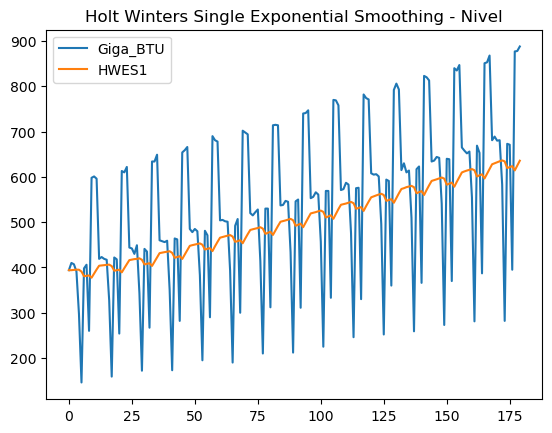

In [381]:
GNVdataProduccion['HWES1'] = SimpleExpSmoothing(GNVdataProduccion['Giga_BTU']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
GNVdataProduccion[['Giga_BTU','HWES1']].plot(title='Holt Winters Single Exponential Smoothing - Nivel')

# Double Smoothing HWES

<Figure size 3000x400 with 0 Axes>

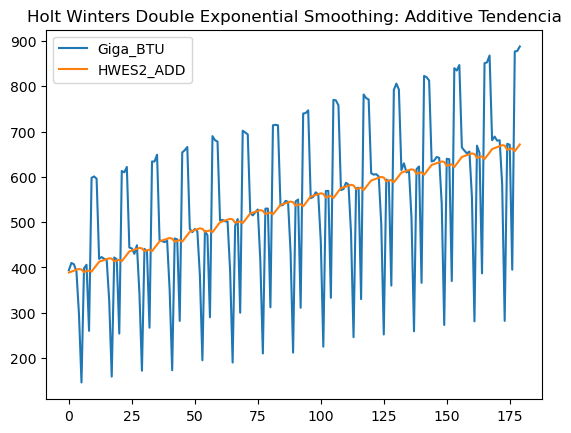

In [382]:
fig = plt.figure(figsize=(30, 4))
GNVdataProduccion['HWES2_ADD'] = ExponentialSmoothing(GNVdataProduccion['Giga_BTU'],trend='add').fit().fittedvalues
GNVdataProduccion['HWES2_MUL'] = ExponentialSmoothing(GNVdataProduccion['Giga_BTU'],trend='mul').fit().fittedvalues
GNVdataProduccion[['Giga_BTU','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive Tendencia')
plt.show()

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive Estacionalidad'}>

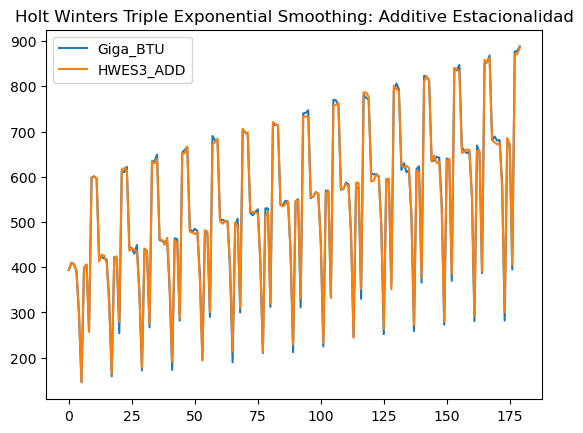

In [384]:
GNVdataProduccion['HWES3_ADD'] = ExponentialSmoothing(GNVdataProduccion['Giga_BTU'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
#GNVdataProduccion['HWES3_MUL'] = ExponentialSmoothing(GNVdataProduccion['Giga_BTU'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
GNVdataProduccion[['Giga_BTU','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Estacionalidad')

In [372]:
GNVdataProduccion

,Fecha,Giga_BTU,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL,HWES1
0,2001-01-01,394,388.947049,352.945455,395.033451,396.151562,394.000000
1,2001-02-01,410,390.748117,359.213983,409.286245,409.416787,394.000000
2,2001-03-01,407,392.960938,366.209424,406.035247,406.115668,394.666667
3,2001-04-01,391,395.038738,372.874343,392.286183,393.089807,395.180556
4,2001-05-01,297,396.607961,378.475017,298.525287,299.066755,395.006366
...,...,...,...,...,...,...,...
175,2015-08-01,671,661.446863,660.824107,671.895858,673.865036,621.757923
176,2015-09-01,395,663.052821,662.557324,405.768787,397.941311,623.809676
177,2015-10-01,877,656.691383,649.072122,870.286076,879.595875,614.275940
178,2015-11-01,878,664.153926,662.063317,871.413151,880.873870,625.222776


# Predicción

In [402]:
GNVdataProduccion_forecast = pd.read_excel("GNVdataCopia.xlsx",sheet_name=3)
GNVdataProduccion_forecast

,Fecha,Giga_BTU
0,2001-01-01,394
1,2001-02-01,410
2,2001-03-01,407
3,2001-04-01,391
4,2001-05-01,297
...,...,...
175,2015-08-01,671
176,2015-09-01,395
177,2015-10-01,877
178,2015-11-01,878


In [434]:
train_GNVdataProduccion = GNVdataProduccion_forecast[:180]
test_GNVdataProduccion = GNVdataProduccion_forecast[144:180]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters Producción')

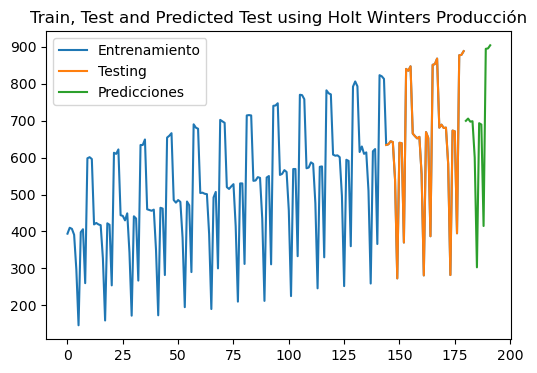

In [438]:
fitted_model = ExponentialSmoothing(train_GNVdataProduccion['Giga_BTU'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictionsProduction = fitted_model.forecast(12)

train_GNVdataProduccion['Giga_BTU'].plot(legend=True,label='Entrenamiento')
test_GNVdataProduccion['Giga_BTU'].plot(legend=True,label='Testing',figsize=(6,4))
test_predictionsProduction.plot(legend=True,label='Predicciones')
plt.title('Train, Test and Predicted Test using Holt Winters Producción')

In [436]:
test_predictionsProduction

180    699.386513
181    705.553408
182    697.151455
183    698.458699
184    600.046339
185    302.841435
186    693.027021
187    689.426119
188    414.757622
189    894.399834
190    895.416971
191    903.956611
dtype: float64